In [1]:
import os
#import joblib
#import re
import glob
import time
import rasterio
import requests
#import matplotlib.pyplot as plt
from matplotlib import pyplot
from rasterio.plot import show
from tqdm import tqdm
from bs4 import BeautifulSoup as bs

In [2]:
base_dir = "/Users/Yash/Dev/CRISMIS GSoC Project/try"
base_url = "https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/"

Currently retrieval has been executed on the basis of scraping the website for all the data, and making it available locally. However, it can be modified to just search for a particular image online and download that only.

In [3]:
def initialize():
    '''
    '''
    try:
        os.chdir(base_dir)
        #print(os.getcwd())
    except:
        print("Error in changing directory")
        
    data_dir = base_dir + '/retrieved_data/'
    
    if not os.path.exists(data_dir):
        try:
            os.mkdir("./retrieved_data/")
            print("Data Directory initialized")
        except:
            pass
    else:
        print("Directory \"retrieved_data\" already present !")
            
    try:
        os.chdir(data_dir)
        print(os.getcwd())
    except:
        print("Error in changing directory")

In [4]:
def downloader(url, path):
    '''
    Download helper function 
    
    Keyword arguments:
    url     -- the url to the file to download
    path    -- full path to where to save the file
    
    '''
    try:
        response = requests.get(url)
    except:
        time.sleep(5)
        response = requests.get(url)
    
    if response:
        open(path, 'wb').write(response.content)

In [5]:
def retriever(doy, *varg):  
    day_url = base_url + doy
    response = requests.get(day_url)
    data = response.text
    soup =  bs(data, 'html.parser')

    cwd = os.getcwd()
    print(cwd)
    work_dir = os.path.join(base_dir, 'retrieved_data', doy)
    print(work_dir)
    
    if not os.path.exists(work_dir):
        try:
            os.mkdir(work_dir)
            print("Work Directory initialized")
        except:
            print("Directory \"" + doy + "\" already present !")  
            
    try:
        os.chdir(work_dir)
        cwd = os.getcwd()
        print(cwd)
    except:
        print("Error in changing directory")
    
    if not varg:
        for href in soup.find_all('a'):
            link = href.get('href')
            if(link[0] not in ('?','/')):
                req_url = day_url + link
                print(link)
                print(req_url)
                path = work_dir + link
                downloader(req_url, path)
    else:
        for arg in varg:
            req_url = day_url + arg
            print(arg)
            print(req_url)
            path = work_dir + arg
            downloader(req_url, path)
                
    os.chdir('../')
    cwd = os.getcwd()
    print(cwd)

In [6]:
def retrieve_all():
    response = requests.get(base_url)
    data = response.text
    soup =  bs(data, 'html.parser')
    
    for href in tqdm(soup.find_all('a'), "Getting Links"):
        link = href.get('href')
        if(link[0] not in ('?','/')):
            print(link)
            retriever(link)

In [7]:
initialize()

Directory "retrieved_data" already present !
/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data


In [8]:
year = 2011
day = 207
img1 = 'EW0220137668G.IMG'
doy = str(year) + "_" + str(day) + "/"
doy
retriever(doy, img1)

/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data
/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2011_207/
/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2011_207
EW0220137668G.IMG
https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/2011_207/EW0220137668G.IMG
/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data


In [9]:
files = [f for f in glob.glob(base_dir + "/retrieved_data/**/*.IMG", recursive=True)]
for f in files:
    if f.find(img1) != -1:
        target = f
        break
target

'/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2011_207/EW0220137668G.IMG'

/Users/Yash/opt/anaconda3/envs/ml/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


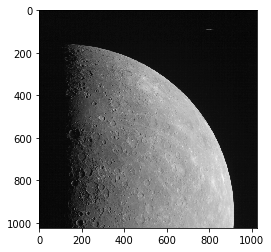

In [10]:
dataset = rasterio.open(target)
show(dataset, cmap='gray')

In [11]:
year = 2014
day = 215
img2 = 'EN1049375684M.IMG'
doy = str(year) + "_" + str(day) + "/"
doy
retriever(doy, img2)

/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data
/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2014_215/
/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2014_215
EN1049375684M.IMG
https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/2014_215/EN1049375684M.IMG
/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data


In [12]:
files = [f for f in glob.glob(base_dir + "/retrieved_data/**/*.IMG", recursive=True)]
for f in files:
    if f.find(img2) != -1:
        target = f
        break
target

'/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2014_215/EN1049375684M.IMG'

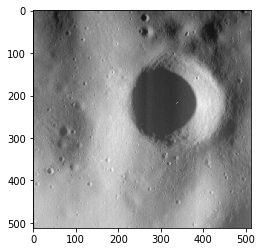

In [13]:
dataset = rasterio.open(target)
show(dataset, cmap='gray')

In [14]:
array = dataset.read()
array.shape

(1, 512, 512)

In [ ]:
dataset.tags()

In [ ]:
print(dataset.width)
print(dataset.height)
print(dataset.bounds)
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
print(dataset.indexes)